In [1]:
#### library(nsROC)
library(pROC)
library(caret)
library("PredictABEL")

auc_test <- function(final_fusion_result_csv){
    ori <- read.csv(final_fusion_result_csv, fileEncoding="gb18030")
    xin_corrected <- ori[, 1:3]
    ren <- data.frame(xin_corrected)
    names(ren) <- c("response","p1","p2")
    auc1 <- roc(response~p1,data=ren,smooth=F)
    auc2 <- roc(response~p2,data=ren,smooth=F)
    print(roc.test(auc1,auc2, paired=TRUE))

    plot(auc1,print.auc=TRUE,print.thres=TRUE,main="多组ROC曲线比较",col="blue",identity.col="blue",identity.lty=1,identity.lwd=1)
    plot(auc2,print.auc=TRUE,print.thres=TRUE,add=TRUE,col="red")
    }

nri_idi_test <- function(final_fusion_result_csv, th){
    ori <- read.csv(final_fusion_result_csv, fileEncoding="gb18030")
    corrected <- ori
    corrected <- data.frame(corrected)
    names(corrected) <- c("response","metric","fusion")
    print(head(corrected))
    preold <- corrected$metric
    prenew <- corrected$fusion
    print(reclassification(data=corrected,cOutcome = 1,predrisk1 = preold,
                     predrisk2 = prenew,cutoff = c(0,th,1)))
    }

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: ggplot2

Loading required package: lattice



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




	DeLong's test for two correlated ROC curves

data:  auc1 and auc2
Z = -4.5917, p-value = 4.397e-06
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.008663090 -0.003479839
sample estimates:
AUC of roc1 AUC of roc2 
  0.8474110   0.8534824 

  response    metric    fusion NA NA
1        1 0.9298919 0.9345583  1  1
2        0 0.3895214 0.4208400  0  0
3        1 0.9311663 0.9335349  1  1
4        1 0.4903649 0.4856319  0  0
5        1 0.9075983 0.9049655  1  1
6        1 0.8760832 0.8882344  1  1
 _________________________________________
 
     Reclassification table    
 _________________________________________

 Outcome: absent 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)    1054      81               7
      [0.5,1]     108     930              10

 
 Outcome: present 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)     351      82             

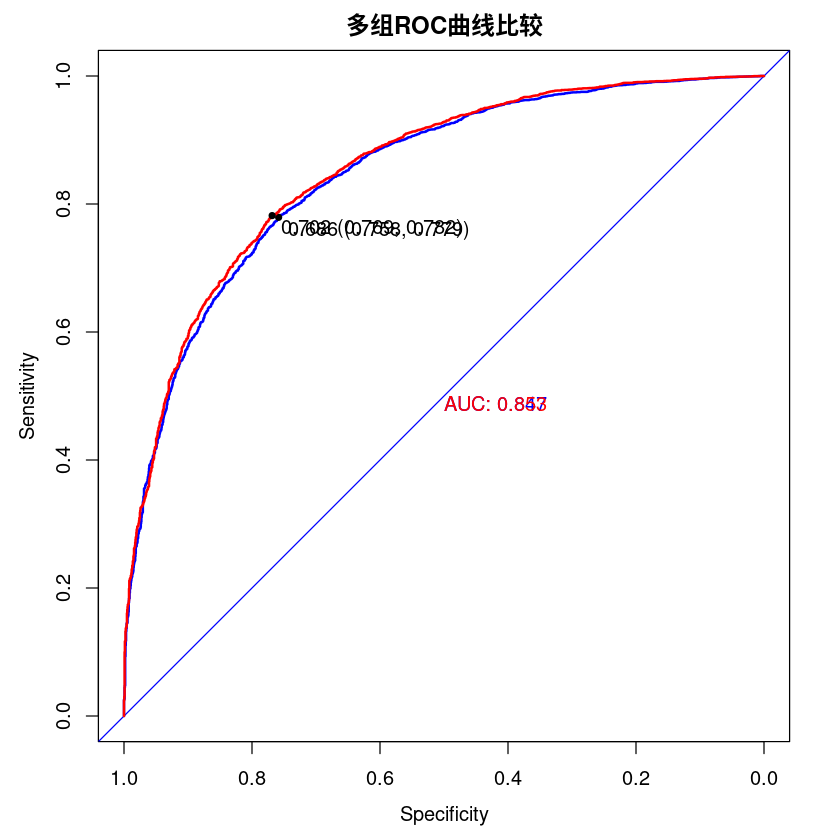

In [3]:
output_dir = '/ssd/kangdang/mmc_project_2023_submission/main_exp_code/step4_exp_analysis/table2/fusion_data/'
save_name = 'scenario_random_metric_and_fusion_score.csv'
auc_test(paste(output_dir, save_name, sep=""))
nri_idi_test(paste(output_dir, save_name, sep=""), 0.5)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




	DeLong's test for two correlated ROC curves

data:  auc1 and auc2
Z = -8.6815, p-value < 2.2e-16
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.03506017 -0.02214530
sample estimates:
AUC of roc1 AUC of roc2 
  0.7656683   0.7942711 

  response    metric    fusion NA NA
1        1 0.7542702 0.8830419  1  1
2        0 0.6620840 0.5896038  0  0
3        1 0.6745222 0.7179204  0  0
4        1 0.6806517 0.5924726  0  0
5        1 0.7160830 0.7934412  1  1
6        1 0.7793369 0.9248369  1  1
 _________________________________________
 
     Reclassification table    
 _________________________________________

 Outcome: absent 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)      22       0               0
      [0.5,1]     947    1204              44

 
 Outcome: present 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)       2       0               0


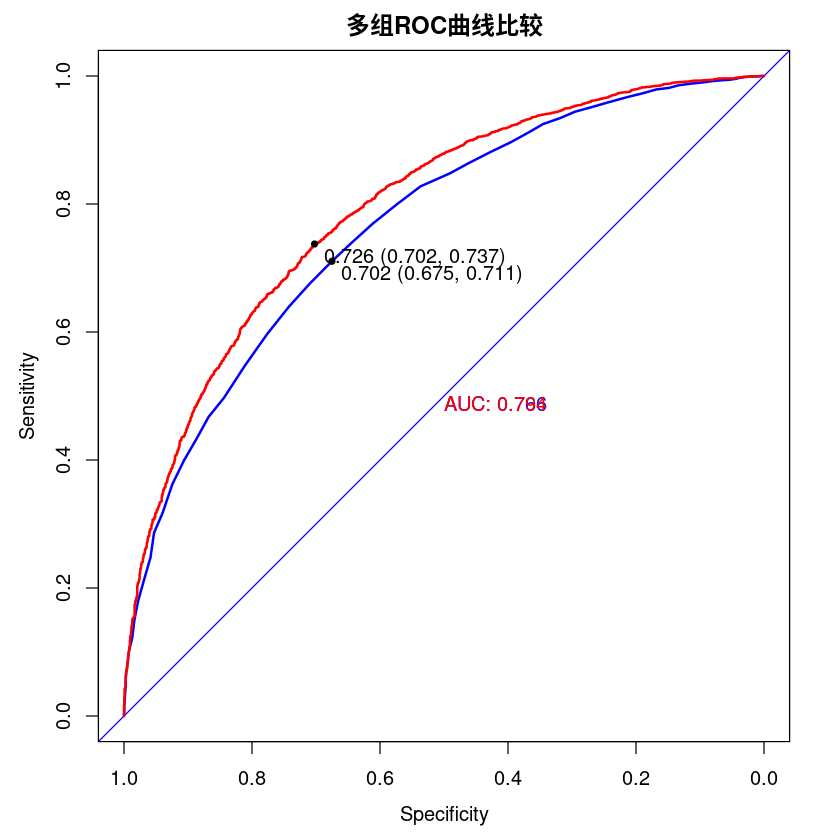

In [4]:
output_dir = '/ssd/kangdang/mmc_project_2023_submission/main_exp_code/step4_exp_analysis/table2/fusion_data/'
save_name = 'scenario_random_metric_and_fusion_score_Age.csv'
auc_test(paste(output_dir, save_name, sep=""))
nri_idi_test(paste(output_dir, save_name, sep=""), 0.5)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




	DeLong's test for two correlated ROC curves

data:  auc1 and auc2
Z = -16.057, p-value < 2.2e-16
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.09071029 -0.07097413
sample estimates:
AUC of roc1 AUC of roc2 
  0.7489968   0.8298390 

  response    metric    fusion NA NA
1        1 0.7803696 0.8852808  1  1
2        0 0.5666878 0.5270911  0  0
3        1 0.9154666 0.9283948  1  1
4        1 0.3838417 0.3353243  0  0
5        1 0.8395259 0.8783843  1  1
6        1 0.7049807 0.8806688  0  1
 _________________________________________
 
     Reclassification table    
 _________________________________________

 Outcome: absent 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)     356     130              27
      [0.5,1]     698     989              41

 
 Outcome: present 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)     105     192              65


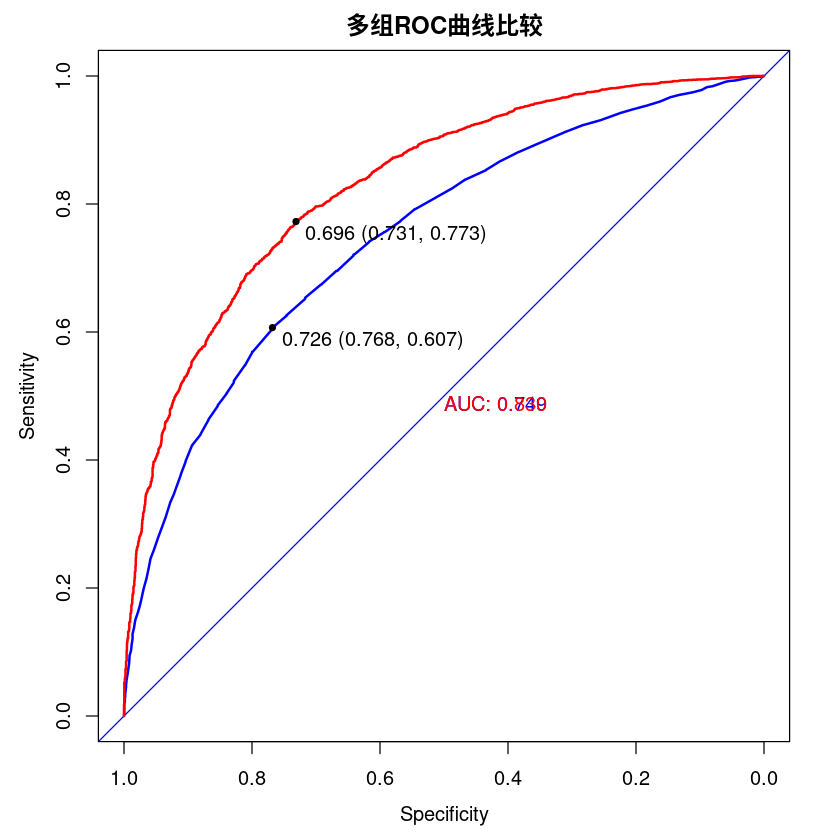

In [5]:
output_dir = '/ssd/kangdang/mmc_project_2023_submission/main_exp_code/step4_exp_analysis/table2/fusion_data/'
save_name = 'scenario_random_metric_and_fusion_score_Systolic Bp.csv'
auc_test(paste(output_dir, save_name, sep=""))
nri_idi_test(paste(output_dir, save_name, sep=""), 0.5)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




	DeLong's test for two correlated ROC curves

data:  auc1 and auc2
Z = -18.442, p-value < 2.2e-16
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.1414356 -0.1142611
sample estimates:
AUC of roc1 AUC of roc2 
  0.6574119   0.7852603 

  response    metric    fusion NA NA
1        1 0.7474896 0.8912811  1  1
2        0 0.6226368 0.5988988  0  0
3        1 0.7135675 0.7892110  1  1
4        1 0.6169719 0.5478609  0  0
5        1 0.6969313 0.8135697  0  1
6        1 0.8355637 0.9398442  1  1
 _________________________________________
 
     Reclassification table    
 _________________________________________

 Outcome: absent 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)       0       0             NaN
      [0.5,1]    1023    1150              47

 
 Outcome: present 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)       0       0             NaN
  

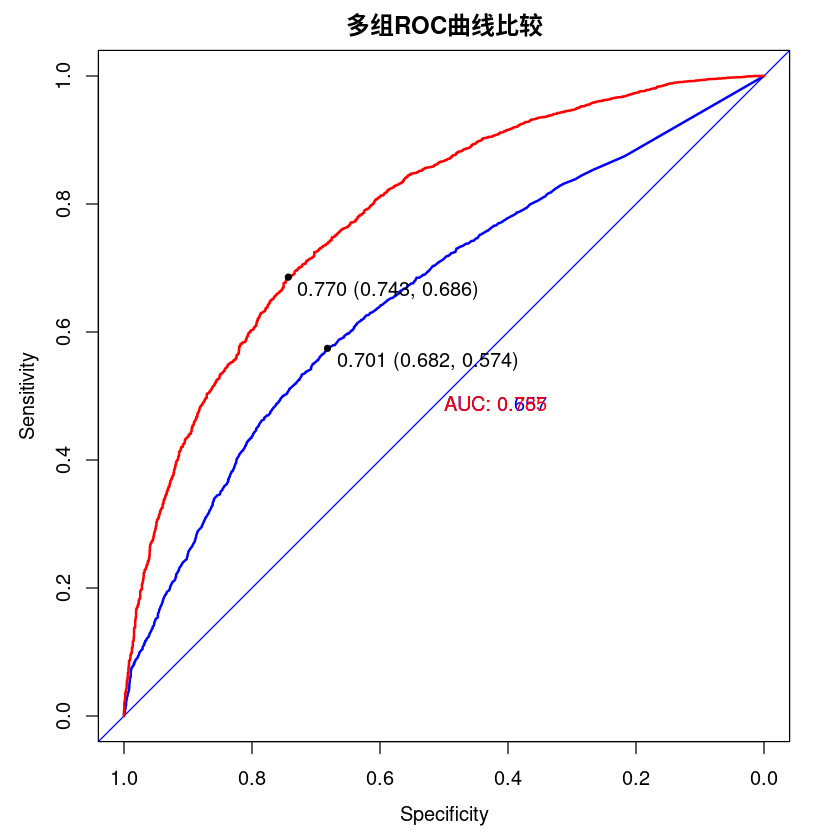

In [6]:
output_dir = '/ssd/kangdang/mmc_project_2023_submission/main_exp_code/step4_exp_analysis/table2/fusion_data/'
save_name = 'scenario_random_metric_and_fusion_score_Course of Diabetes.csv'
auc_test(paste(output_dir, save_name, sep=""))
nri_idi_test(paste(output_dir, save_name, sep=""), 0.5)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




	DeLong's test for two correlated ROC curves

data:  auc1 and auc2
Z = -24.182, p-value < 2.2e-16
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.1530729 -0.1301203
sample estimates:
AUC of roc1 AUC of roc2 
  0.6493176   0.7909142 

  response    metric    fusion NA NA
1        1 0.7250623 0.9123287  1  1
2        0 0.6971933 0.5917034  0  0
3        1 0.7250623 0.8479853  1  1
4        1 0.6971933 0.5481027  0  0
5        1 0.7250623 0.8636569  1  1
6        1 0.6971933 0.8838694  0  1
 _________________________________________
 
     Reclassification table    
 _________________________________________

 Outcome: absent 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)       0       0             NaN
      [0.5,1]    1015    1158              47

 
 Outcome: present 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)       0       0             NaN
  

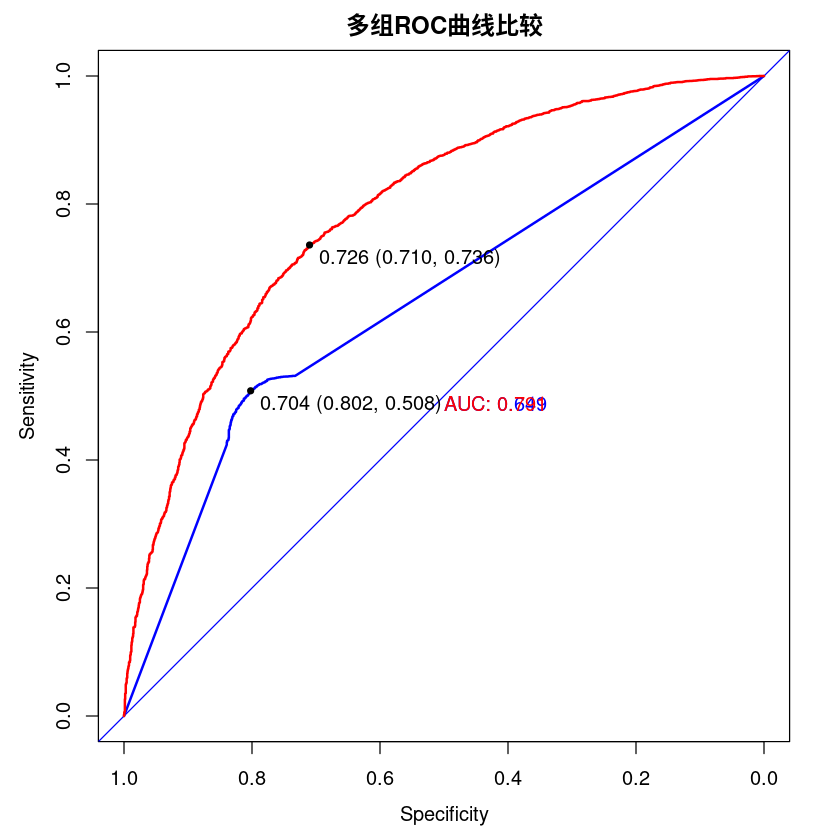

In [7]:
output_dir = '/ssd/kangdang/mmc_project_2023_submission/main_exp_code/step4_exp_analysis/table2/fusion_data/'
save_name = 'scenario_random_metric_and_fusion_score_Hypertension.csv'
auc_test(paste(output_dir, save_name, sep=""))
nri_idi_test(paste(output_dir, save_name, sep=""), 0.5)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




	DeLong's test for two correlated ROC curves

data:  auc1 and auc2
Z = -23.416, p-value < 2.2e-16
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.1832516 -0.1549441
sample estimates:
AUC of roc1 AUC of roc2 
  0.6314685   0.8005663 

  response    metric    fusion NA NA
1        1 0.6771157 0.8375274  0  1
2        0 0.6581021 0.5891195  0  0
3        1 0.8423265 0.8792015  1  1
4        1 0.6955499 0.5902248  0  0
5        1 0.8186484 0.8737351  1  1
6        1 0.6955499 0.8867935  0  1
 _________________________________________
 
     Reclassification table    
 _________________________________________

 Outcome: absent 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)      59      20              25
      [0.5,1]     928    1166              44

 
 Outcome: present 
  
             Updated Model
Initial Model [0,0.5) [0.5,1]  % reclassified
      [0,0.5)      13      61              82
  

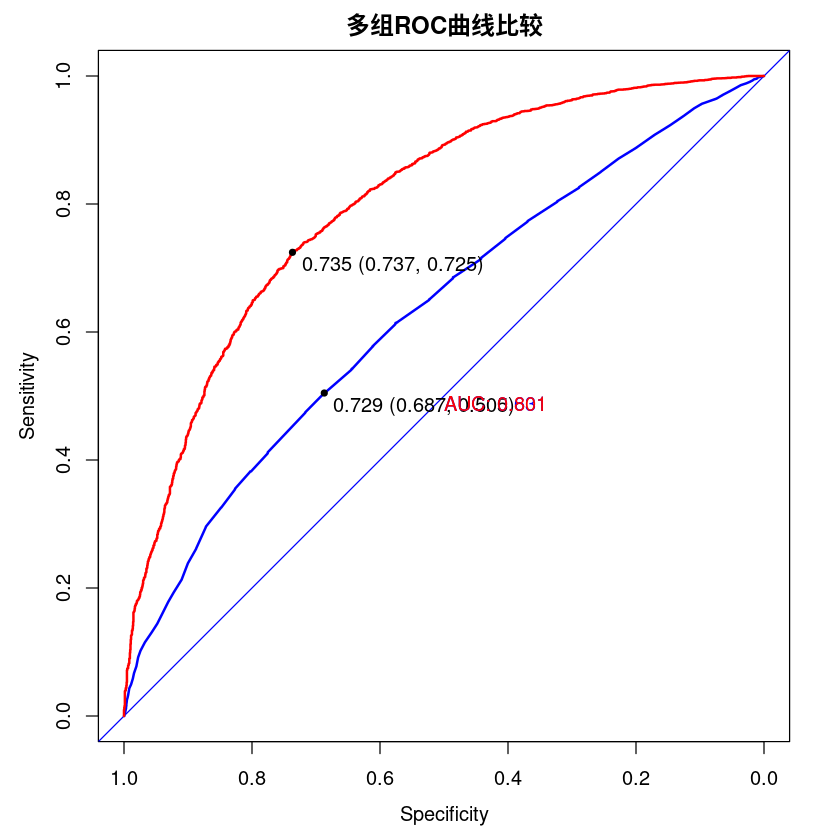

In [8]:
output_dir = '/ssd/kangdang/mmc_project_2023_submission/main_exp_code/step4_exp_analysis/table2/fusion_data/'
save_name = 'scenario_random_metric_and_fusion_score_Diastolic Bp.csv'
auc_test(paste(output_dir, save_name, sep=""))
nri_idi_test(paste(output_dir, save_name, sep=""), 0.5)